# Notebook 02: Analisis Exploratorio de Datos (EDA)

## Objetivo
Realizar un analisis visual y estadistico profundo de los datos del precio del cobre para entender:
- Tendencias a lo largo del tiempo
- Estacionalidad
- Volatilidad
- Outliers y eventos extremos
- Autocorrelacion (importante para ARIMA)

---

## 1. Importar Librerias

In [1]:
import sys
import os

# Obtener directorio del proyecto
if os.path.basename(os.getcwd()) == 'notebooks':
    project_root = os.path.dirname(os.getcwd())
else:
    project_root = os.getcwd()

sys.path.insert(0, project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from src.data_loader import load_copper_data
from src.visualization import setup_plot_style

# Configurar estilo
import yaml
config_path = os.path.join(project_root, 'config.yaml')
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)
setup_plot_style(config)
%matplotlib inline

print("Librerias importadas correctamente")
print(f"Project root: {project_root}")

Librerias importadas correctamente
Project root: /workspaces/codespaces-jupyter/predictor-precio-cobre


## 2. Cargar Datos

In [2]:
# Cargar datos desde CSV
df = load_copper_data('../data/raw/precio_cobre_yahoo.csv')

print(f"Datos cargados: {len(df)} registros")
print(f"Periodo: {df['fecha'].min()} a {df['fecha'].max()}")
df.head()

Cargando datos desde: ../data/raw/precio_cobre_yahoo.csv
Datos cargados: 3962 registros desde 2010-01-04 00:00:00 hasta 2025-10-02 00:00:00
Datos cargados: 3962 registros
Periodo: 2010-01-04 00:00:00 a 2025-10-02 00:00:00


,fecha,precio_cobre_usd_lb
0,2010-01-04,3.3880
1,2010-01-05,3.3960
2,2010-01-06,3.4775
3,2010-01-07,3.4115
4,2010-01-08,3.3880


## 3. Serie Temporal Completa

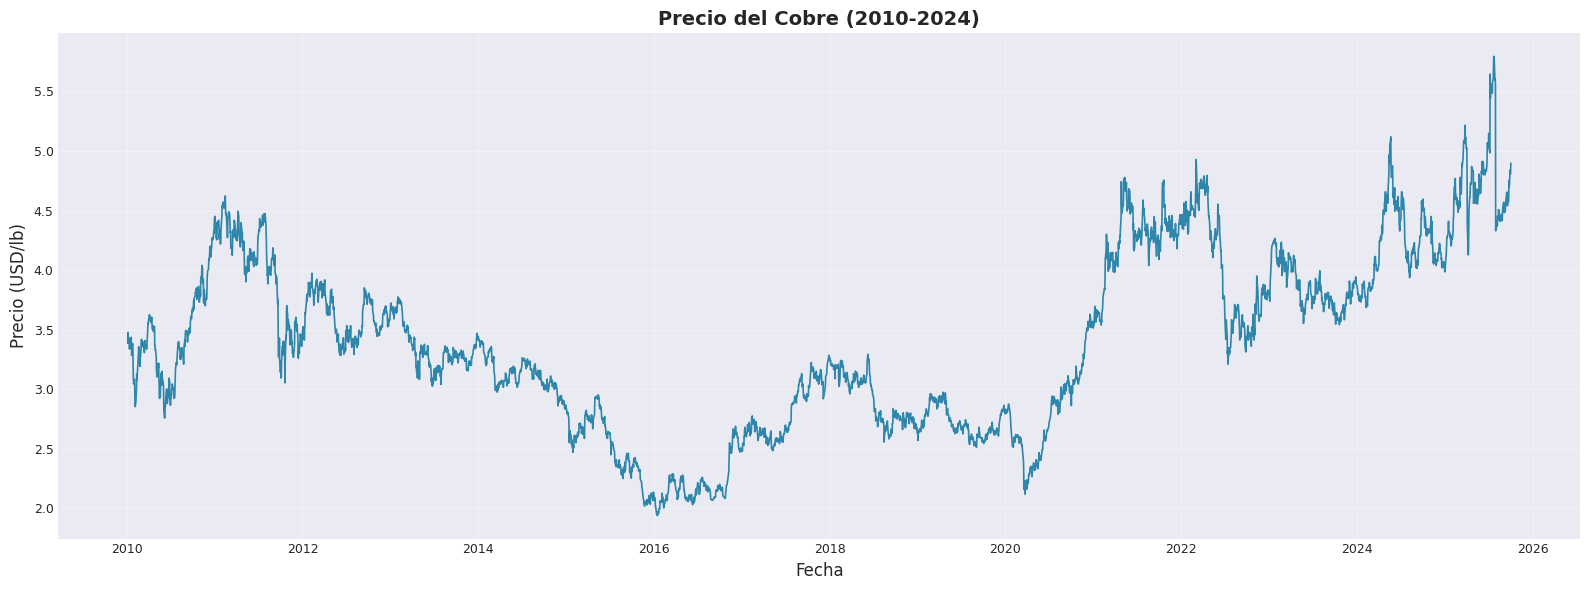

Observaciones iniciales:
- Identificar tendencias generales (alcista, bajista)
- Detectar picos y caidas abruptas
- Notar periodos de alta volatilidad


In [3]:
# Grafico de serie temporal
plt.figure(figsize=(16, 6))
plt.plot(df['fecha'], df['precio_cobre_usd_lb'], linewidth=1.2, color='#2E86AB')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio (USD/lb)', fontsize=12)
plt.title('Precio del Cobre (2010-2024)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Observaciones iniciales:")
print("- Identificar tendencias generales (alcista, bajista)")
print("- Detectar picos y caidas abruptas")
print("- Notar periodos de alta volatilidad")

## 4. Distribucion de Precios

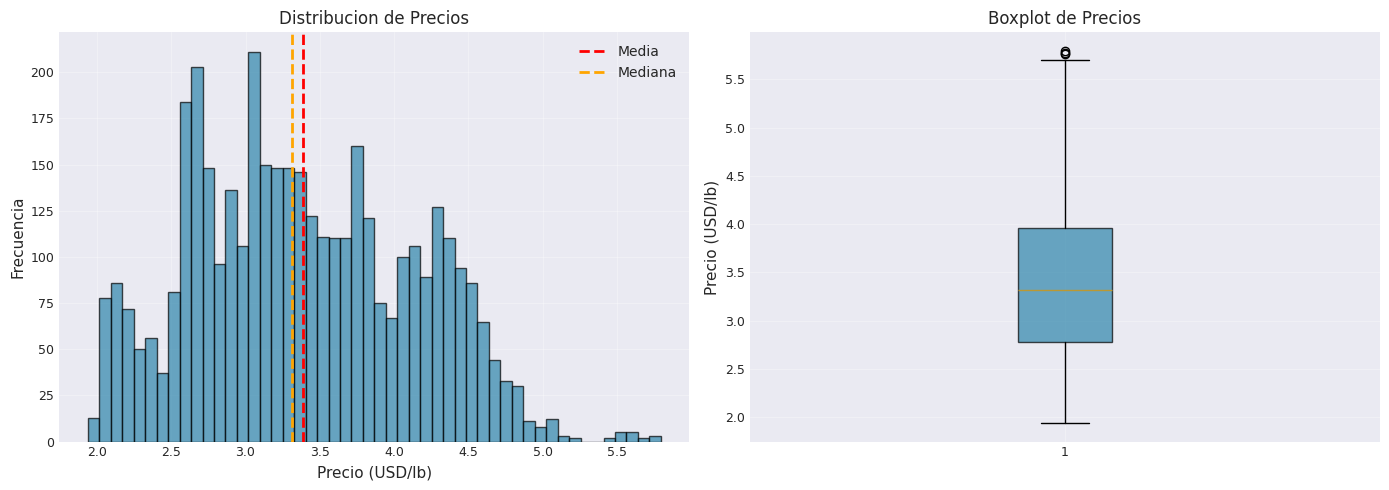

Media: $3.3860
Mediana: $3.3127
Desviacion estandar: $0.7411


In [4]:
# Histograma y boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['precio_cobre_usd_lb'], bins=50, edgecolor='black', color='#2E86AB', alpha=0.7)
axes[0].axvline(df['precio_cobre_usd_lb'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
axes[0].axvline(df['precio_cobre_usd_lb'].median(), color='orange', linestyle='--', linewidth=2, label='Mediana')
axes[0].set_xlabel('Precio (USD/lb)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribucion de Precios')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['precio_cobre_usd_lb'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='#2E86AB', alpha=0.7))
axes[1].set_ylabel('Precio (USD/lb)')
axes[1].set_title('Boxplot de Precios')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Media: ${df['precio_cobre_usd_lb'].mean():.4f}")
print(f"Mediana: ${df['precio_cobre_usd_lb'].median():.4f}")
print(f"Desviacion estandar: ${df['precio_cobre_usd_lb'].std():.4f}")

## 5. Analisis por Año

<Figure size 1600x600 with 0 Axes>

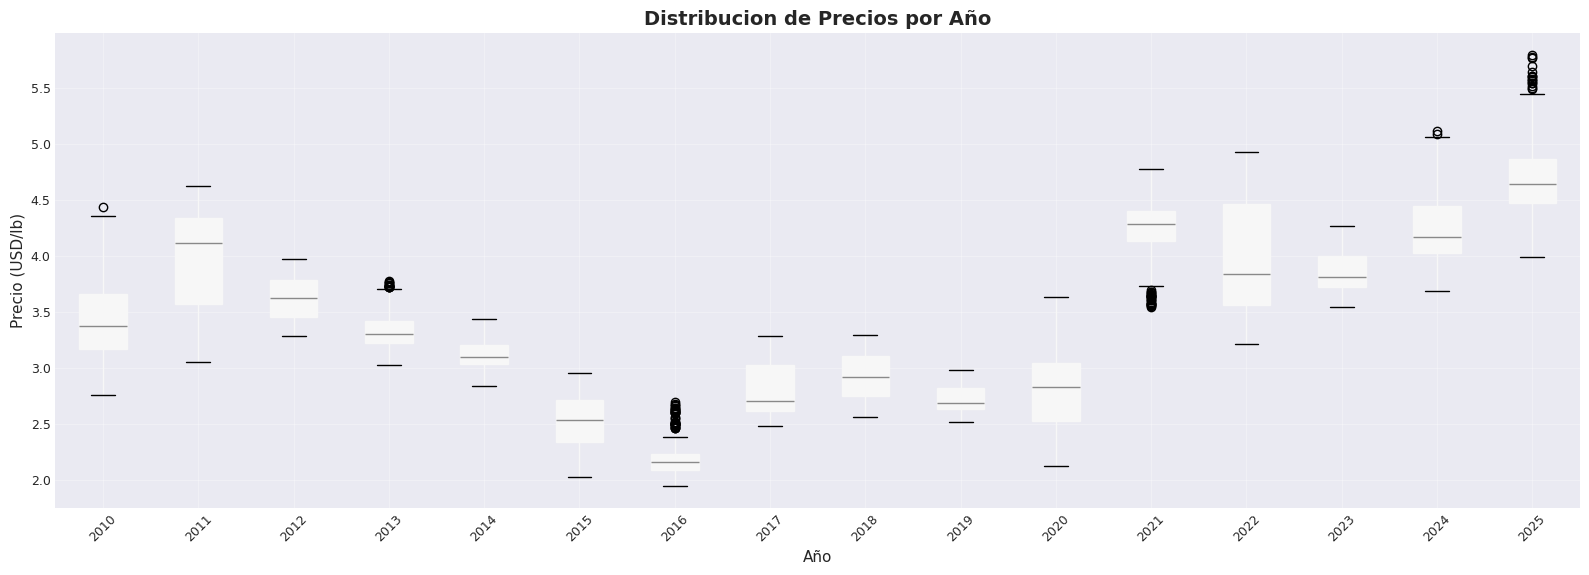


Precio promedio por año:
        mean     min     max     std
year                                
2010  3.4299  2.7590  4.4395  0.3648
2011  4.0005  3.0545  4.6230  0.4162
2012  3.6126  3.2835  3.9745  0.1797
2013  3.3376  3.0260  3.7755  0.1759
2014  3.1183  2.8355  3.4315  0.1288
2015  2.5056  2.0195  2.9505  0.2485
2016  2.1973  1.9395  2.6890  0.1655
2017  2.8053  2.4810  3.2860  0.2239
2018  2.9234  2.5570  3.2930  0.2031
2019  2.7210  2.5125  2.9755  0.1206
2020  2.8029  2.1195  3.6285  0.3683
2021  4.2494  3.5390  4.7785  0.2833
2022  4.0037  3.2105  4.9290  0.4792
2023  3.8530  3.5420  4.2670  0.1811
2024  4.2205  3.6860  5.1190  0.3027
2025  4.7157  3.9885  5.7950  0.3711


In [5]:
# Agregar columna de año
df['year'] = df['fecha'].dt.year

# Boxplot por año
plt.figure(figsize=(16, 6))
df.boxplot(column='precio_cobre_usd_lb', by='year', figsize=(16, 6), patch_artist=True)
plt.suptitle('')
plt.title('Distribucion de Precios por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Precio (USD/lb)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Estadisticas por año
print("\nPrecio promedio por año:")
print(df.groupby('year')['precio_cobre_usd_lb'].agg(['mean', 'min', 'max', 'std']).round(4))

## 6. Analisis de Estacionalidad

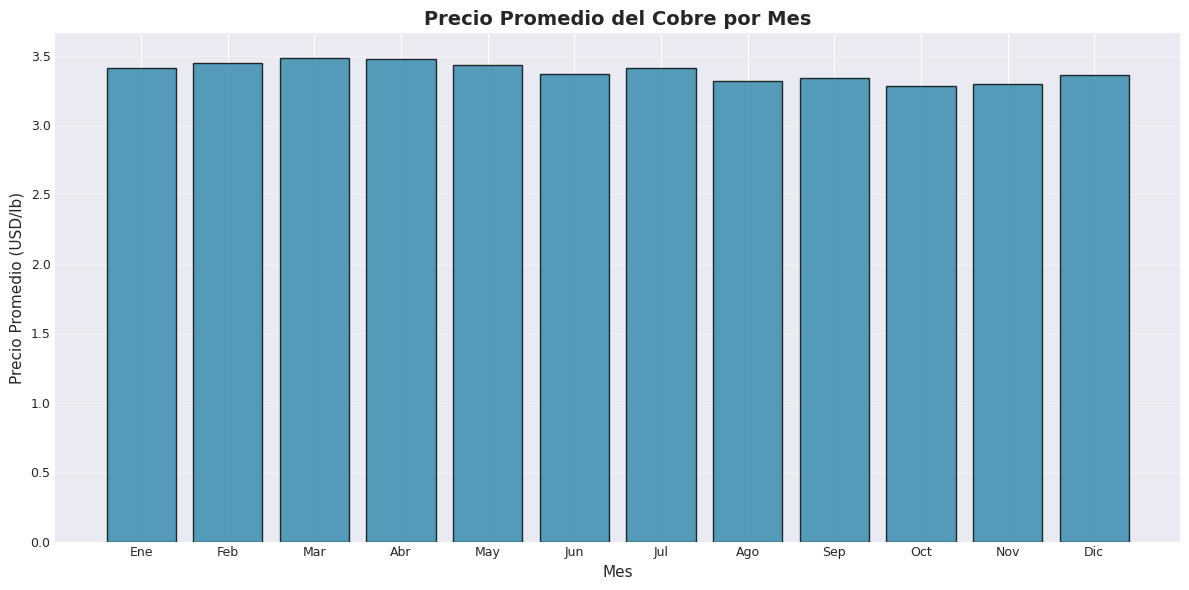


Precio promedio por mes:
month
1     3.4115
2     3.4484
3     3.4860
4     3.4735
5     3.4358
6     3.3698
7     3.4085
8     3.3171
9     3.3422
10    3.2798
11    3.2947
12    3.3597
Name: precio_cobre_usd_lb, dtype: float64


In [6]:
# Agregar columna de mes
df['month'] = df['fecha'].dt.month

# Precio promedio por mes
precio_por_mes = df.groupby('month')['precio_cobre_usd_lb'].mean()

plt.figure(figsize=(12, 6))
plt.bar(precio_por_mes.index, precio_por_mes.values, color='#2E86AB', alpha=0.8, edgecolor='black')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio (USD/lb)')
plt.title('Precio Promedio del Cobre por Mes', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nPrecio promedio por mes:")
print(precio_por_mes.round(4))

## 7. Rolling Statistics (Promedios Moviles)

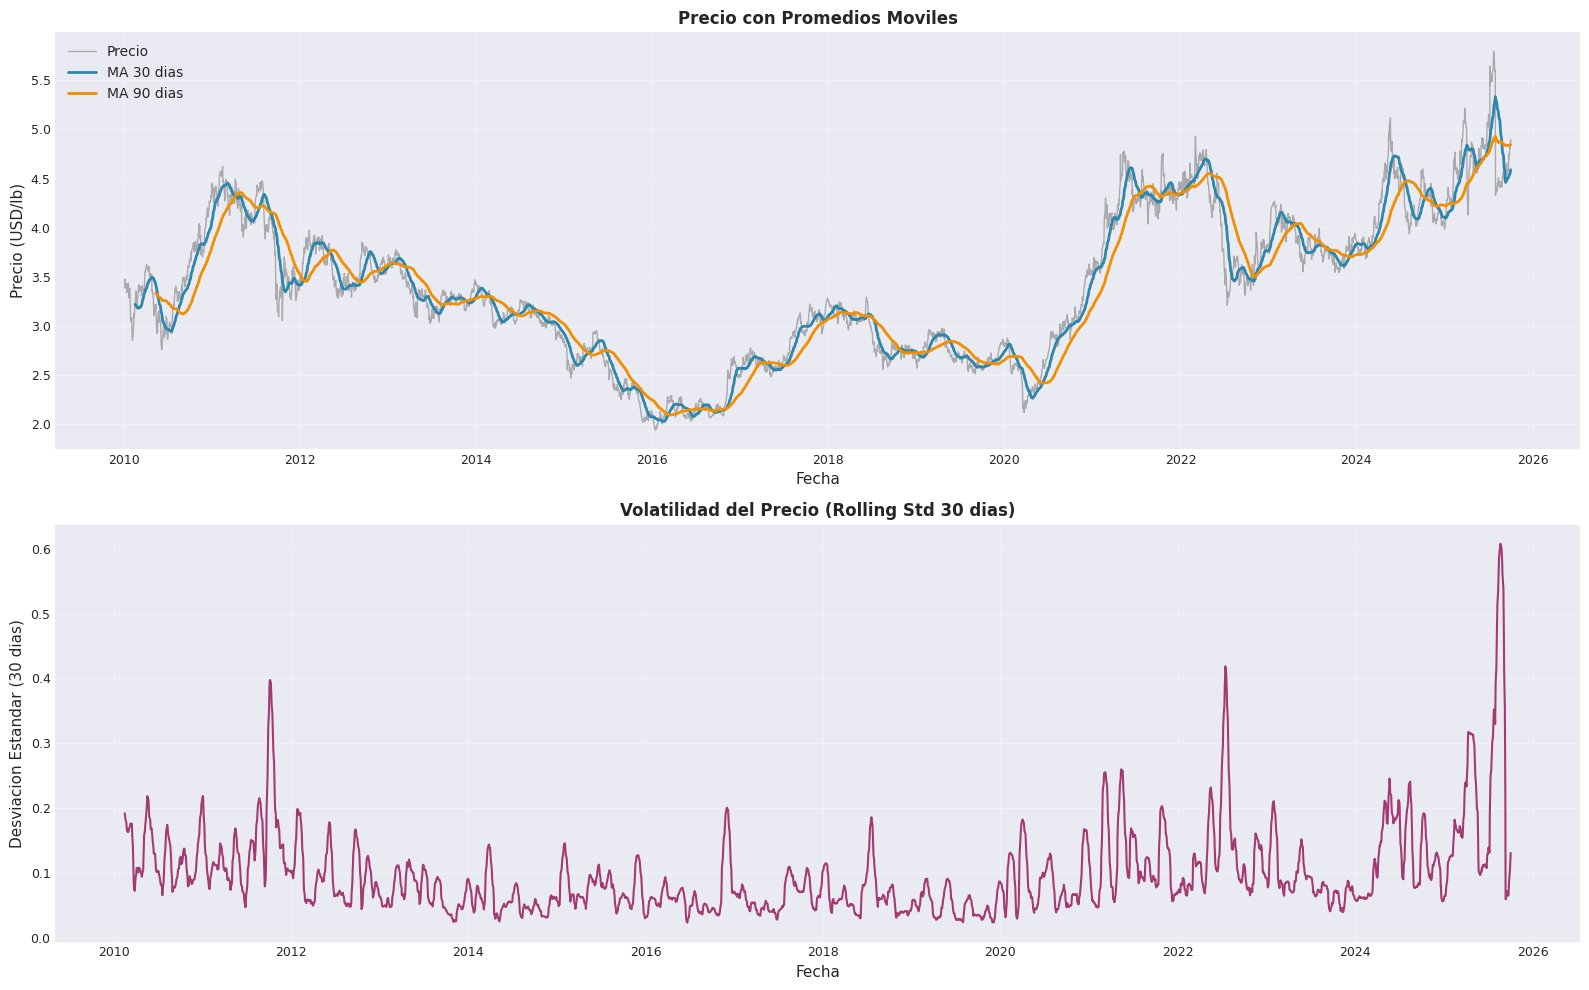

In [7]:
# Calcular promedios moviles
df['rolling_mean_30'] = df['precio_cobre_usd_lb'].rolling(window=30).mean()
df['rolling_mean_90'] = df['precio_cobre_usd_lb'].rolling(window=90).mean()
df['rolling_std_30'] = df['precio_cobre_usd_lb'].rolling(window=30).std()

# Grafico
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Precio con promedios moviles
axes[0].plot(df['fecha'], df['precio_cobre_usd_lb'], label='Precio', linewidth=1, alpha=0.6, color='gray')
axes[0].plot(df['fecha'], df['rolling_mean_30'], label='MA 30 dias', linewidth=2, color='#2E86AB')
axes[0].plot(df['fecha'], df['rolling_mean_90'], label='MA 90 dias', linewidth=2, color='#F18F01')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Precio (USD/lb)')
axes[0].set_title('Precio con Promedios Moviles', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Desviacion estandar movil (volatilidad)
axes[1].plot(df['fecha'], df['rolling_std_30'], linewidth=1.5, color='#A23B72')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Desviacion Estandar (30 dias)')
axes[1].set_title('Volatilidad del Precio (Rolling Std 30 dias)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Autocorrelacion (ACF y PACF)

Estos graficos son importantes para determinar el orden del modelo ARIMA:
- **ACF (Autocorrelation Function):** Correlacion con valores pasados
- **PACF (Partial Autocorrelation Function):** Correlacion parcial, eliminando efectos indirectos

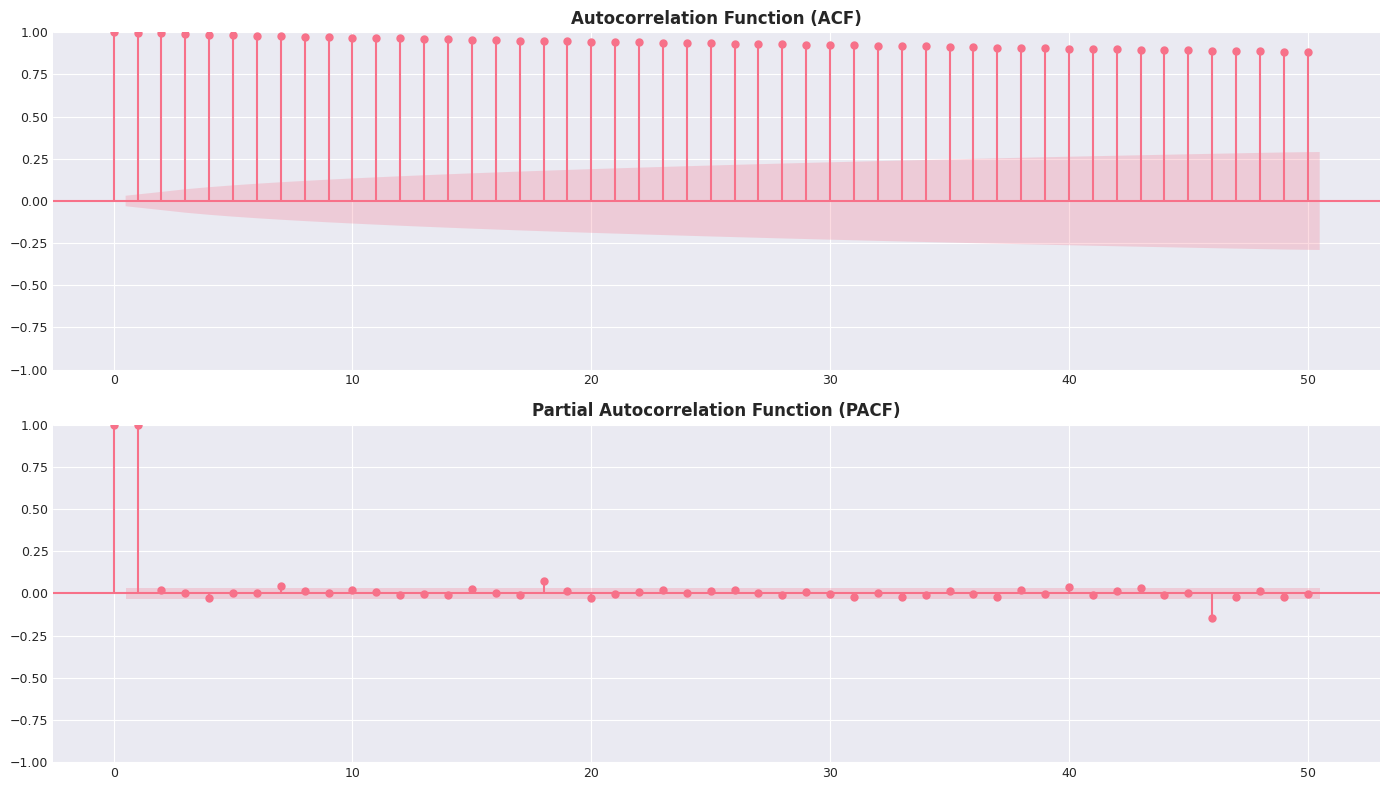


Interpretacion:
- ACF: Si decae lentamente, la serie tiene tendencia fuerte
- PACF: Los primeros lags significativos sugieren el orden p para ARIMA


In [8]:
# ACF y PACF
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

plot_acf(df['precio_cobre_usd_lb'].dropna(), lags=50, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)', fontweight='bold')

plot_pacf(df['precio_cobre_usd_lb'].dropna(), lags=50, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nInterpretacion:")
print("- ACF: Si decae lentamente, la serie tiene tendencia fuerte")
print("- PACF: Los primeros lags significativos sugieren el orden p para ARIMA")

## 9. Descomposicion de Serie Temporal

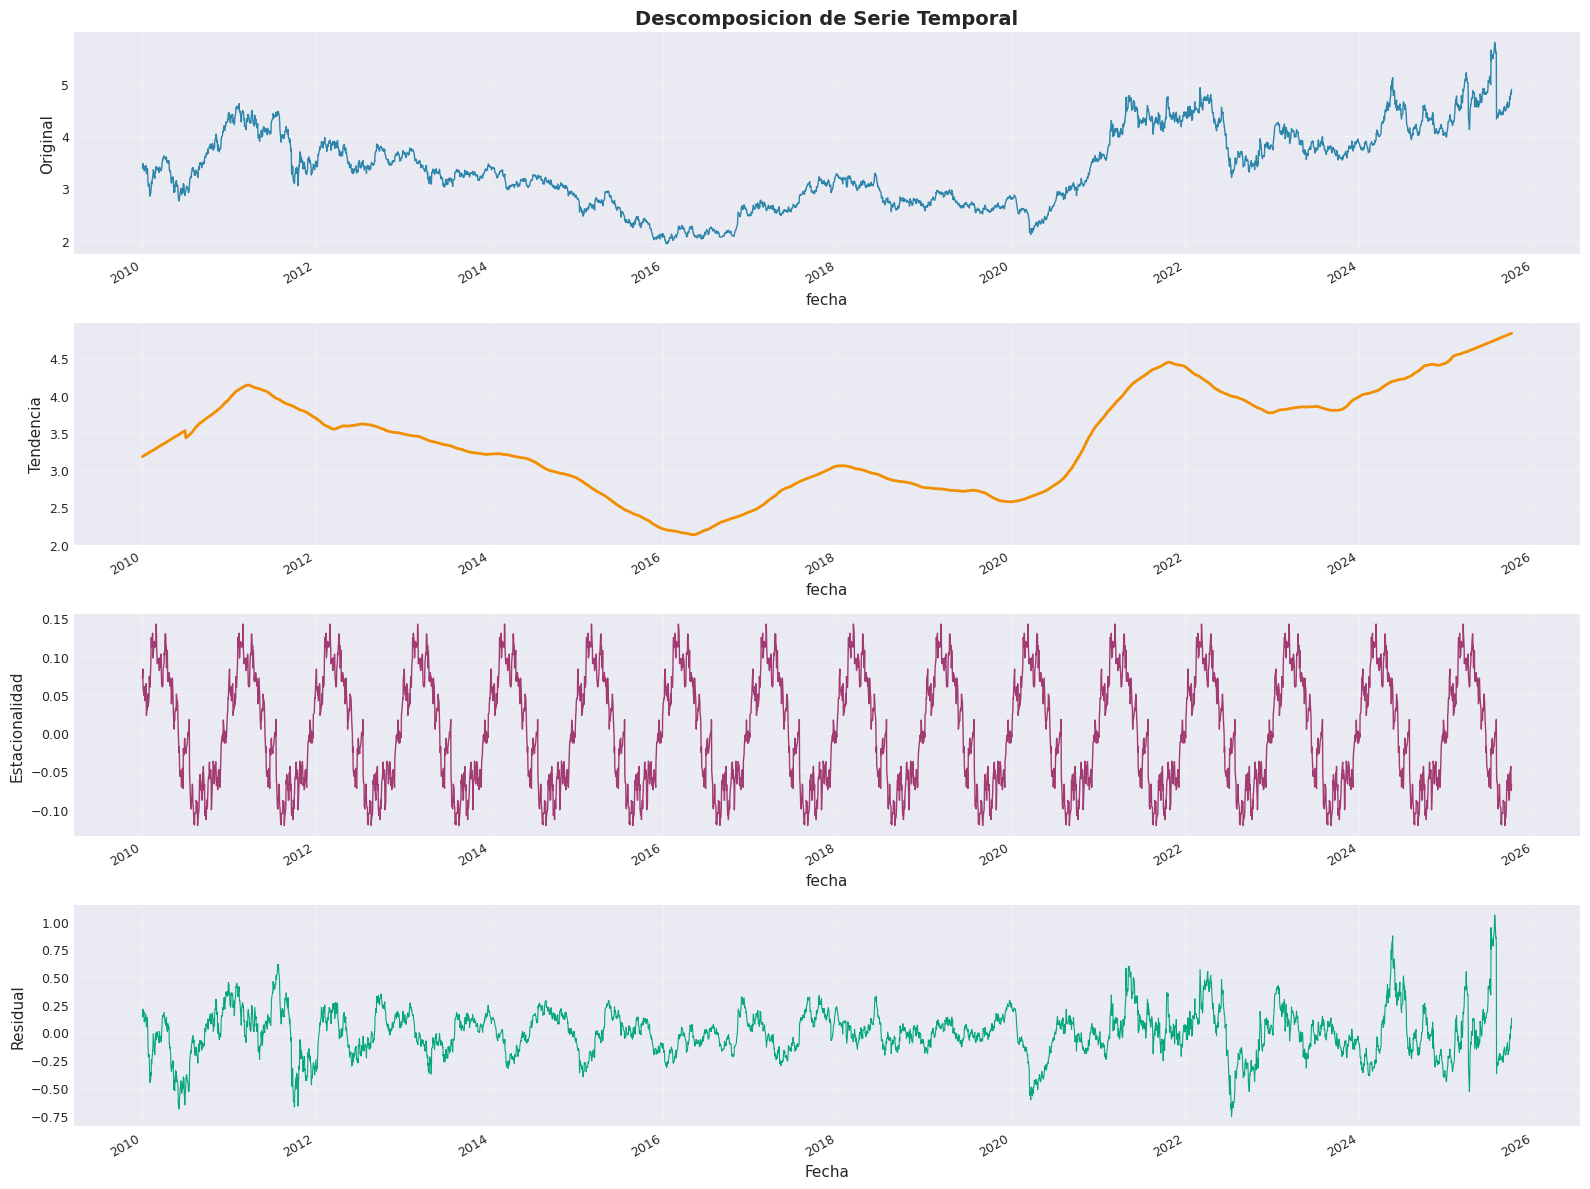

In [9]:
# Preparar serie temporal
df_ts = df.set_index('fecha')['precio_cobre_usd_lb']

# Descomponer (periodo anual: ~252 dias de trading)
decomposition = seasonal_decompose(df_ts, model='additive', period=252, extrapolate_trend='freq')

# Graficar
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

decomposition.observed.plot(ax=axes[0], color='#2E86AB', linewidth=1)
axes[0].set_ylabel('Original')
axes[0].set_title('Descomposicion de Serie Temporal', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

decomposition.trend.plot(ax=axes[1], color='#F18F01', linewidth=2)
axes[1].set_ylabel('Tendencia')
axes[1].grid(True, alpha=0.3)

decomposition.seasonal.plot(ax=axes[2], color='#A23B72', linewidth=1)
axes[2].set_ylabel('Estacionalidad')
axes[2].grid(True, alpha=0.3)

decomposition.resid.plot(ax=axes[3], color='#06A77D', linewidth=0.8)
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Fecha')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Deteccion de Outliers


Outliers detectados: 40

Top 10 cambios mas extremos:
          fecha  precio_cobre_usd_lb  pct_change
3900 2025-07-08               5.6450   13.251080
3230 2022-11-04               3.7145    7.464195
456  2011-10-24               3.4470    7.082942
838  2013-05-03               3.3135    6.732159
2844 2021-04-27               4.7430    6.632196
459  2011-10-27               3.6890    5.762614
482  2011-11-30               3.5630    5.539101
455  2011-10-21               3.2190    5.385497
3814 2025-03-05               4.7665    5.278848
3223 2022-10-26               3.6295    5.187651


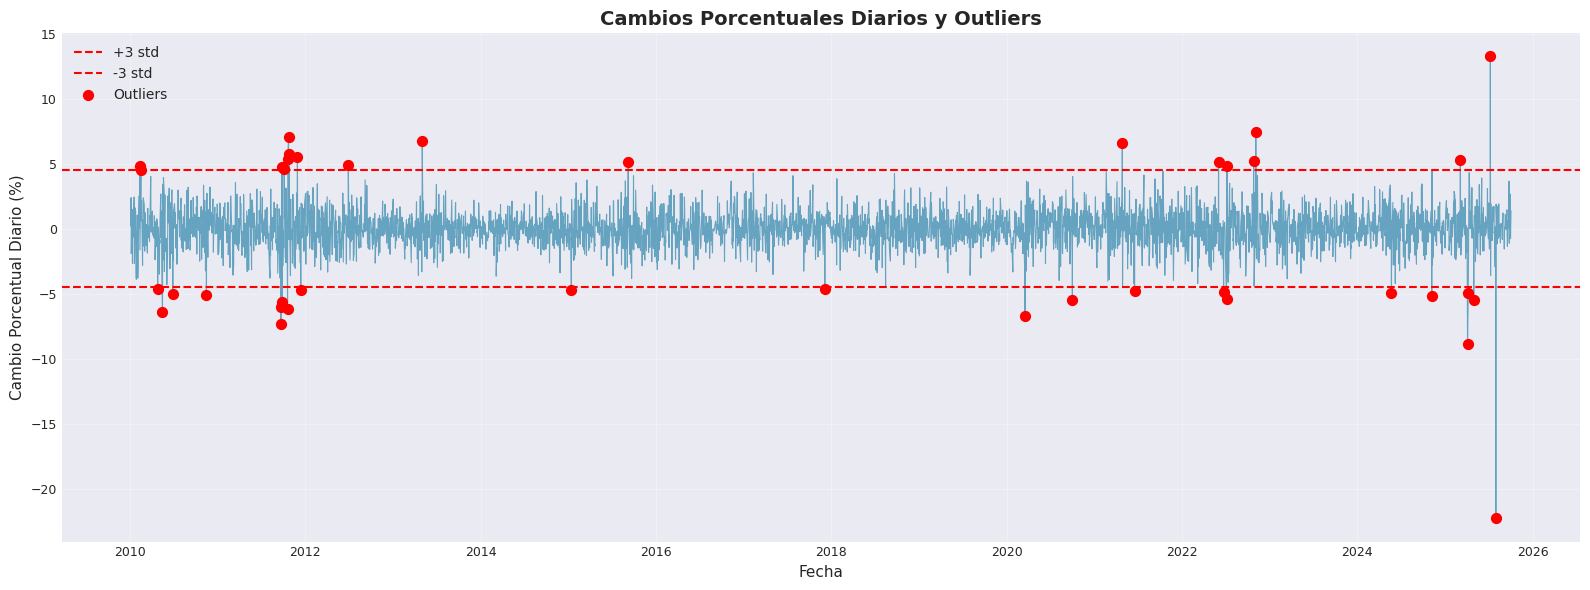

In [10]:
# Calcular cambios porcentuales diarios
df['pct_change'] = df['precio_cobre_usd_lb'].pct_change() * 100

# Identificar cambios extremos (>3 desviaciones estandar)
mean_change = df['pct_change'].mean()
std_change = df['pct_change'].std()
threshold = 3

outliers = df[np.abs(df['pct_change'] - mean_change) > threshold * std_change]

print(f"\nOutliers detectados: {len(outliers)}")
print("\nTop 10 cambios mas extremos:")
print(outliers.nlargest(10, 'pct_change')[['fecha', 'precio_cobre_usd_lb', 'pct_change']])

# Grafico de cambios porcentuales
plt.figure(figsize=(16, 6))
plt.plot(df['fecha'], df['pct_change'], linewidth=0.8, color='#2E86AB', alpha=0.7)
plt.axhline(y=mean_change + threshold*std_change, color='red', linestyle='--', label=f'+{threshold} std')
plt.axhline(y=mean_change - threshold*std_change, color='red', linestyle='--', label=f'-{threshold} std')
plt.scatter(outliers['fecha'], outliers['pct_change'], color='red', s=50, zorder=5, label='Outliers')
plt.xlabel('Fecha')
plt.ylabel('Cambio Porcentual Diario (%)')
plt.title('Cambios Porcentuales Diarios y Outliers', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Conclusiones del EDA

### Hallazgos principales:
1. **Tendencia:** Serie con tendencia alcista general, con precio promedio de $3.39/lb (mediana $3.31/lb). Periodo de depresión 2015-2016 ($2.10-$2.50/lb), seguido de recuperación sostenida hasta 2021-2025 alcanzando máximos históricos ($4.20-$4.71/lb promedio anual). Desviación estándar de $0.74 indica volatilidad moderada.

2. **Estacionalidad:** Estacionalidad débil pero presente. Meses con precios más altos: Marzo-Mayo ($3.43-$3.49/lb promedio). Meses más bajos: Octubre-Noviembre ($3.28-$3.29/lb). Diferencia estacional de ~5% entre picos y valles.

3. **Volatilidad:** Tres periodos de alta volatilidad identificados: 2011 (crisis europea), 2020 (COVID-19, std=0.37), y 2022 (guerra Ucrania, std=0.48). Periodo de baja volatilidad: 2013-2014 y 2019 (std<0.18). Volatilidad actual (2025) en niveles medios-altos (std=0.37).

4. **Outliers:** 40 outliers detectados (>3 desviaciones estándar). Cambio más extremo: +13.25% (julio 2025). Eventos destacados: octubre-noviembre 2011 (crisis deuda europea, +7%), abril 2021 (recuperación post-COVID, +6.6%), noviembre 2022 (volatilidad geopolítica, +7.5%).

5. **Autocorrelación:** ACF decae muy lentamente, confirmando tendencia fuerte y persistencia temporal. PACF muestra correlación significativa en primeros 1-3 lags, sugiriendo orden p=1 a p=3 para componente AR en ARIMA. Serie claramente no estacionaria, requiere diferenciación.

### Implicaciones para el modelo:
- ARIMA es apropiado dada la fuerte autocorrelación y no estacionariedad observada
- Los lags identificados en PACF sugieren ARIMA(1,1,1) o ARIMA(2,1,1) como puntos de partida
- La tendencia requiere diferenciación (d=1 en ARIMA, confirmado por ACF de decaimiento lento)
- Features de rolling statistics (MA 30, MA 90, volatilidad) serán útiles para Linear Regression
- Estacionalidad débil pero presente puede beneficiarse de SARIMA con periodo anual (252 días trading)
- Outliers deben ser monitoreados pero no eliminados (reflejan eventos económicos reales)

**Próximo paso:** Notebook 03 - Feature Engineering